In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("water_potability_final.csv")

In [3]:
# Display first 5 rows
print(" First 5 rows of dataset:")
print(df.head())

 First 5 rows of dataset:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.026271  0.259195 -0.139471     0.112415  0.967633      1.708954   
1 -2.284628 -2.036414 -0.385987    -0.307694 -0.004303      2.062575   
2  0.697402  0.847665 -0.240047     1.360594 -0.004303     -0.094032   
3  0.845476  0.547651  0.000493     0.592008  0.645832     -0.778830   
4  1.373063 -0.464429 -0.460249    -0.363698 -0.647713     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       -1.180651         1.305542  -1.286298           0  
1        0.270597        -0.639080   0.684218           0  
2        0.781117         0.000907  -1.167365           0  
3        1.255134         2.152263   0.848412           0  
4       -0.824357        -2.182193   0.138786           0  


In [4]:
# Basic info
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3996 non-null   float64
 1   Hardness         3996 non-null   float64
 2   Solids           3996 non-null   float64
 3   Chloramines      3996 non-null   float64
 4   Sulfate          3996 non-null   float64
 5   Conductivity     3996 non-null   float64
 6   Organic_carbon   3996 non-null   float64
 7   Trihalomethanes  3996 non-null   float64
 8   Turbidity        3996 non-null   float64
 9   Potability       3996 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 312.3 KB
None


In [5]:
# Summary statistics
print("\n Summary Statistics:")
print(df.describe())



 Summary Statistics:
                ph     Hardness       Solids  Chloramines      Sulfate  \
count  3996.000000  3996.000000  3996.000000  3996.000000  3996.000000   
mean      0.000917    -0.005571     0.000033     0.008420    -0.004133   
std       0.963770     0.986892     0.990570     0.987537     1.016094   
min      -4.812885    -4.530454    -2.474344    -4.277288    -5.659588   
25%      -0.503777    -0.588148    -0.712101    -0.610498    -0.457382   
50%      -0.026271     0.014369    -0.125309     0.009053    -0.004303   
75%       0.506121     0.600713     0.601423     0.620722     0.469127   
max       4.712098     3.855680     4.472689     3.793631     4.080807   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3996.000000     3996.000000      3996.000000  3996.000000  3996.000000  
mean      -0.006312       -0.002091        -0.001924     0.000515     0.500000  
std        0.983594        0.986040         0.986270     0.980926   

In [6]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [7]:
# Check target distribution
print("\n Potability Value Counts:")
print(df['Potability'].value_counts())


 Potability Value Counts:
Potability
0    1998
1    1998
Name: count, dtype: int64


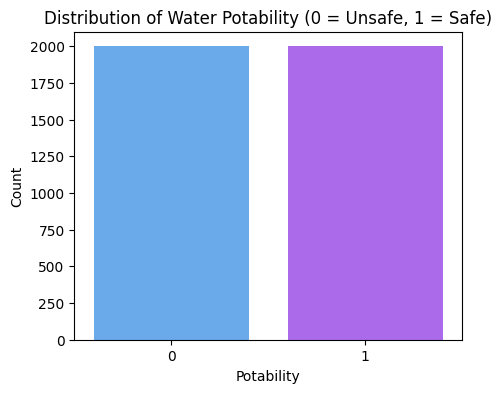

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='Potability', hue='Potability', data=df, palette='cool', legend=False)
plt.title("Distribution of Water Potability (0 = Unsafe, 1 = Safe)")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()


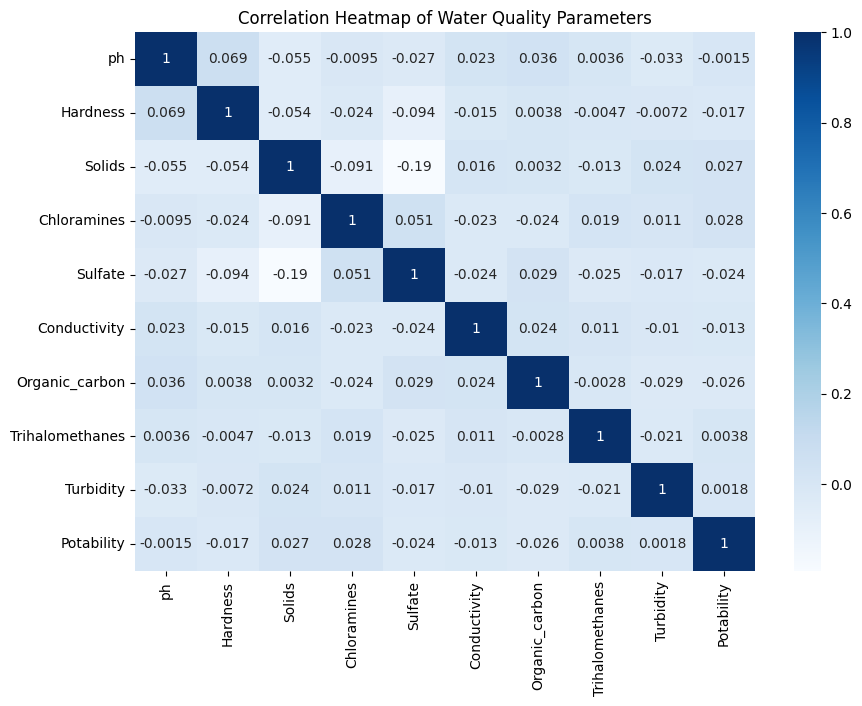

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Water Quality Parameters")
plt.show()


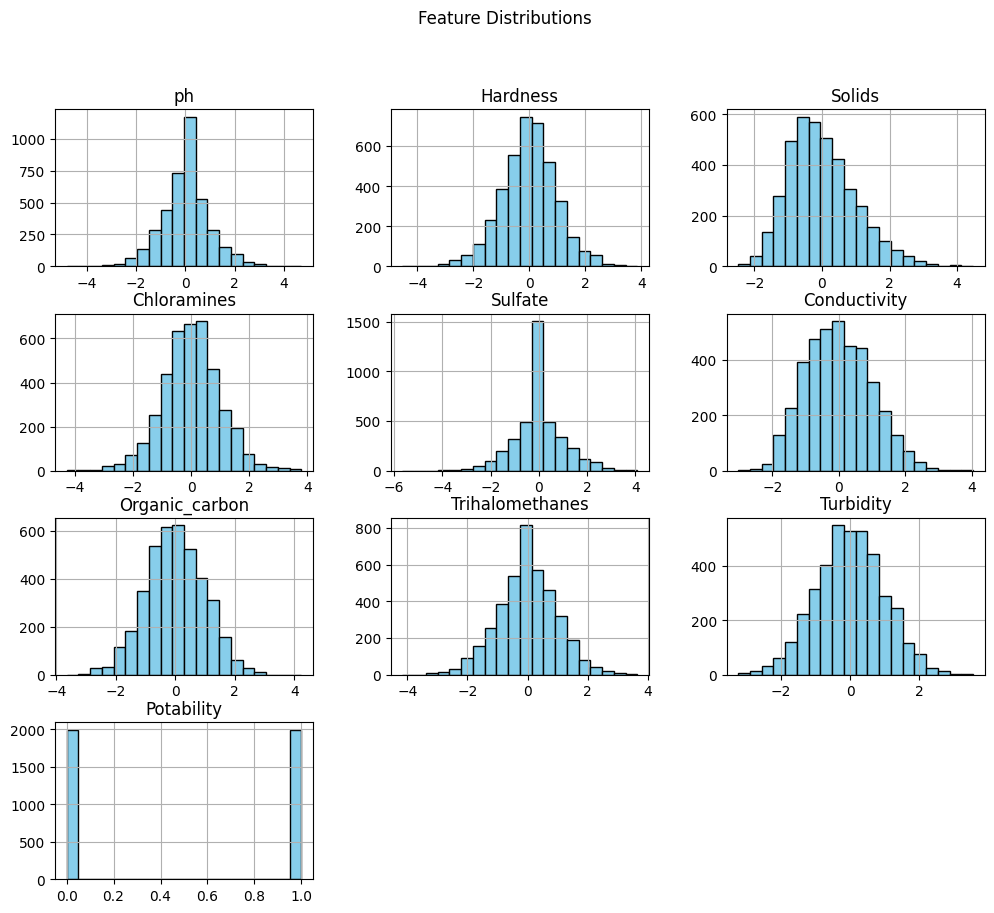

In [10]:
# Visualize feature distributions
df.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

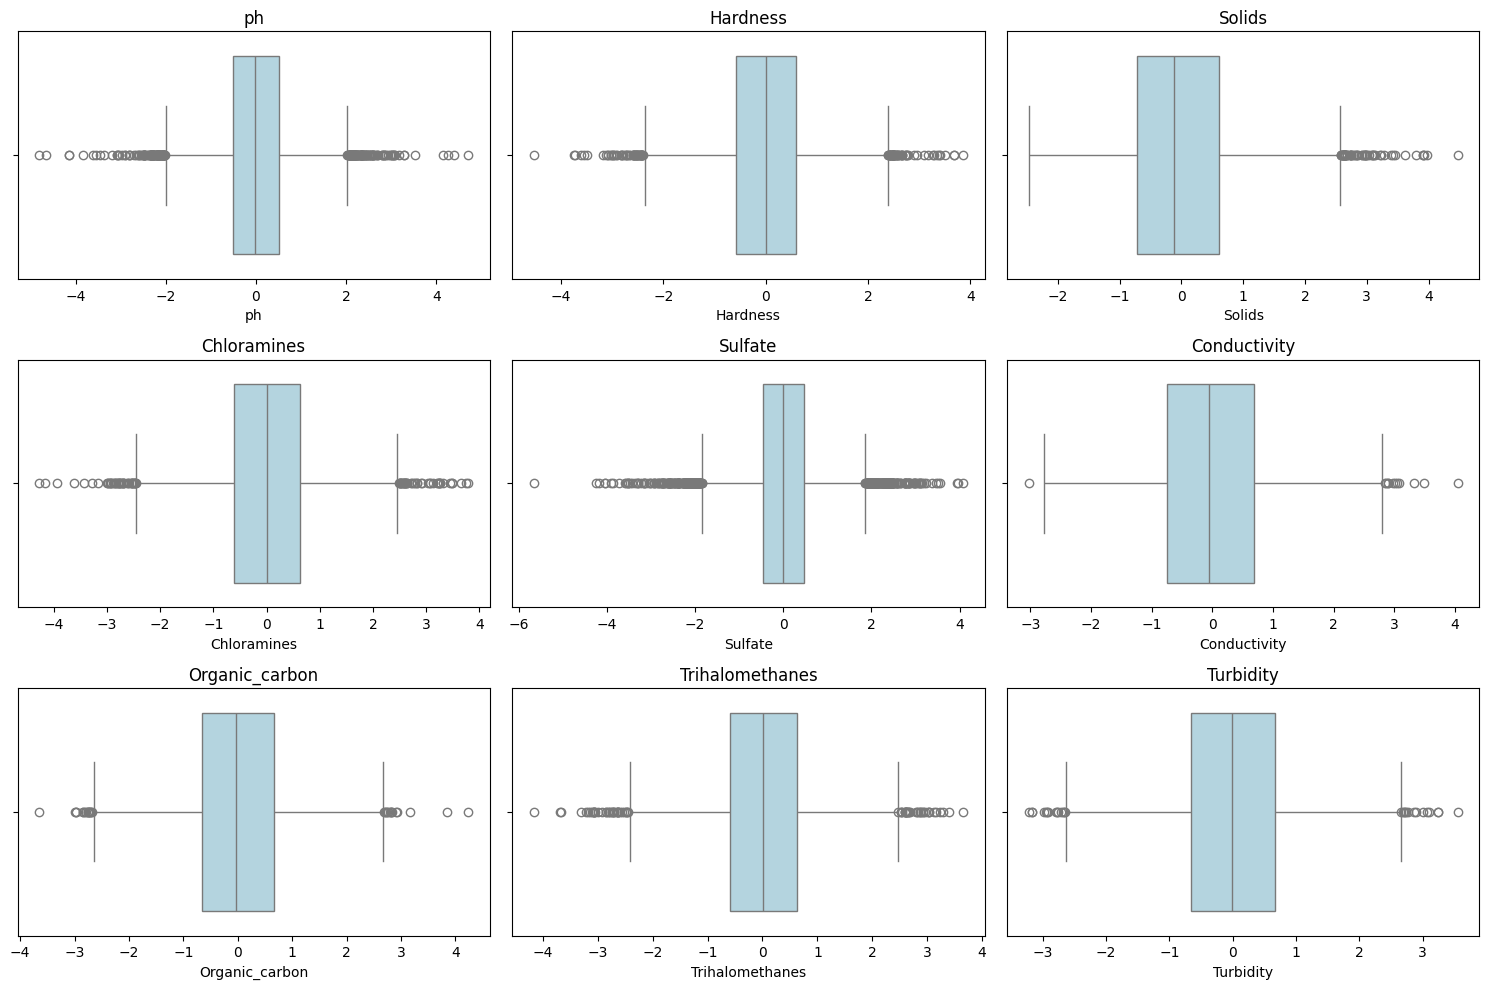

In [11]:
# Boxplots to check outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1]):  # exclude target
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()


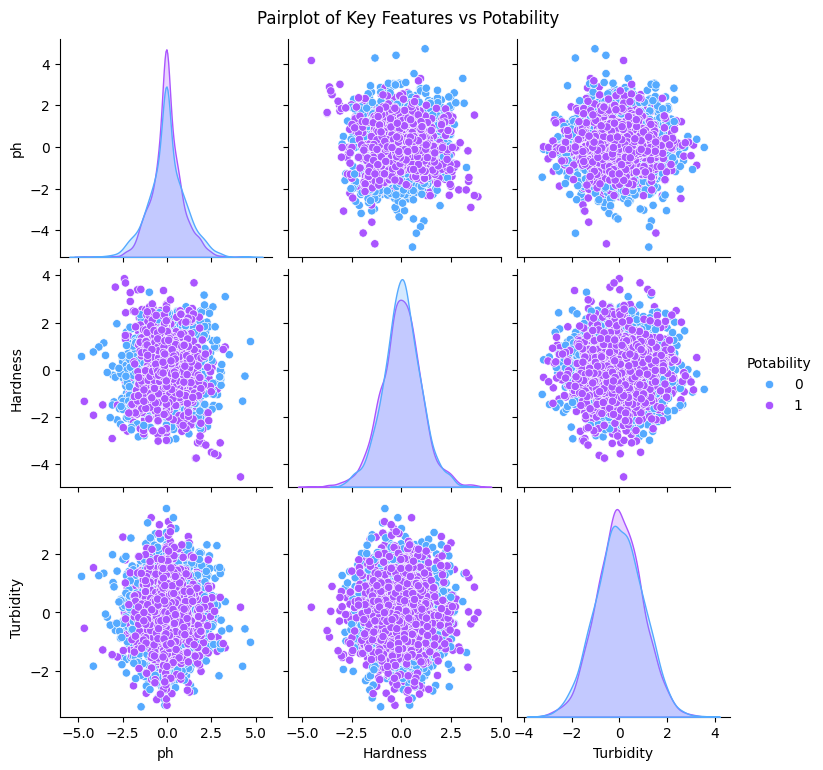

In [12]:
# Pairplot for selected features
sns.pairplot(df[['ph', 'Hardness', 'Turbidity', 'Potability']], hue='Potability', palette='cool')
plt.suptitle("Pairplot of Key Features vs Potability", y=1.02)
plt.show()


In [13]:
# Handle missing values (if any)
df = df.fillna(df.mean())
print("\n Missing values handled using column means.")


 Missing values handled using column means.


In [14]:
# Check correlation with target
correlation_with_target = df.corr()['Potability'].sort_values(ascending=False)
print("\n Correlation with Potability:")
print(correlation_with_target)


 Correlation with Potability:
Potability         1.000000
Chloramines        0.027787
Solids             0.027281
Trihalomethanes    0.003802
Turbidity          0.001814
ph                -0.001494
Conductivity      -0.013028
Hardness          -0.016860
Sulfate           -0.024015
Organic_carbon    -0.026458
Name: Potability, dtype: float64


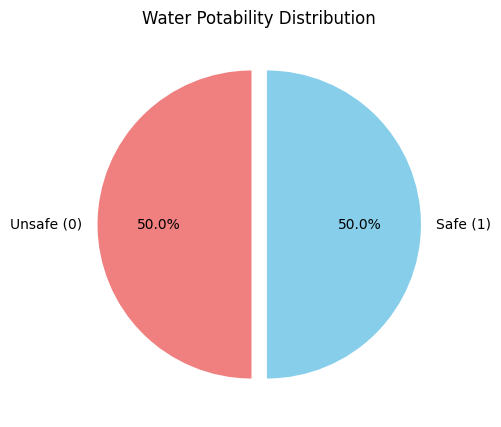

In [15]:
# Pie chart for Potability distribution
labels = ['Unsafe (0)', 'Safe (1)']
sizes = df['Potability'].value_counts().values
colors = ['lightcoral', 'skyblue']
explode = (0.05, 0.05)

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title("Water Potability Distribution")
plt.show()


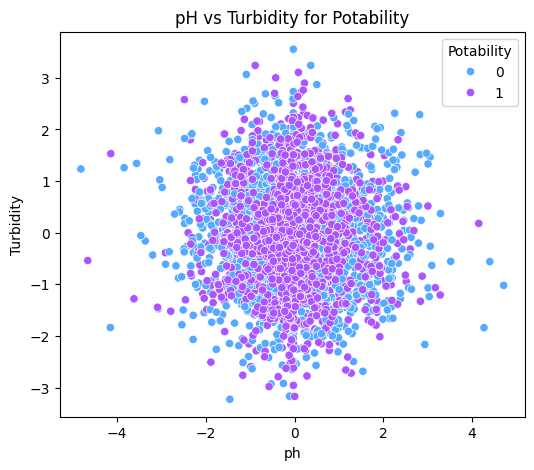

In [16]:
# Scatter Plot Between Two Important Features
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='ph', y='Turbidity', hue='Potability', palette='cool')
plt.title("pH vs Turbidity for Potability")
plt.show()



 Class Distribution (Potability):
Potability
0    1998
1    1998
Name: count, dtype: int64


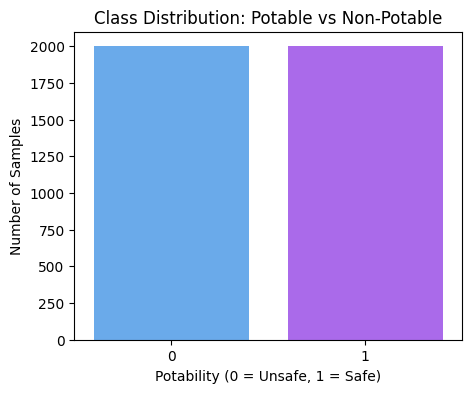

Class 0: 1998 samples (50.00%)
Class 1: 1998 samples (50.00%)

 Dataset seems fairly balanced.


In [17]:
print("\n Class Distribution (Potability):")
class_counts = df['Potability'].value_counts()
print(class_counts)

plt.figure(figsize=(5,4))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='cool', legend=False)
plt.title("Class Distribution: Potable vs Non-Potable")
plt.xlabel("Potability (0 = Unsafe, 1 = Safe)")
plt.ylabel("Number of Samples")
plt.show()

# Class percentage display
total = len(df)
for label, count in class_counts.items():
    print(f"Class {label}: {count} samples ({(count/total)*100:.2f}%)")

# Check if dataset is balanced
safe = class_counts[1]
unsafe = class_counts[0]
imbalance_ratio = abs(safe - unsafe) / total

if imbalance_ratio > 0.1:
    print("\n Dataset seems imbalanced!")
    print("Consider using SMOTE or class weights while training.")
else:
    print("\n Dataset seems fairly balanced.")
